# Face Recognition

### importing data


In [198]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path


im = Image.open('./Data/f1v1e1-300x400.gif')
img = np.array(im.getdata())


#plt.gray() 
#plt.matshow(img) 
#plt.show()


In [199]:
imgs = []
path = "./Data"
valid_images = [".gif"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))
    
#Converting images into numpy data arrays
for i in range(len(imgs)):
    imgs[i] = np.array(imgs[i].getdata())

Images have the size of 300*400 

<Figure size 432x288 with 0 Axes>

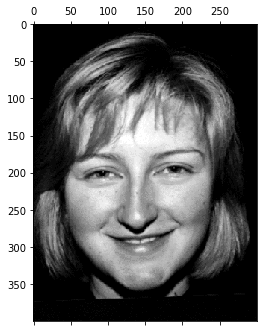

In [200]:
plt.figure()
plt.gray()

h = 400 #height
w = 300 #width

plt.matshow(imgs[1].reshape(h,w)) 

plt.show()

## Preparing the data

In [201]:

    
#Image matrix
images = np.array(imgs) 


#Creating the data class target
#the data images are 32 groups each one contains 6 face positions
y = []
k = 1
for i in range(1,33):
    for j in range(6):
        y.append(k)
    k = k+1
    
    
#Target Vector  
y = np.array(y)



In [202]:
images.shape

(192, 120000)

## Spliting data (Train , Test)

In [203]:
nb_img = len(imgs)

X_train = []
Y_train =[]

X_test = []
Y_test = []



for i in range(nb_img):
    if (i-2)%6 == 0:
        X_test.append(imgs[i])
        Y_test.append(y[i])
    else:
        X_train.append(imgs[i])
        Y_train.append(y[i])

X_train = np.array(X_train)     
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In our data each image is represented as a row in the matrix and iin order to use the PCA function and scikit learn library we need to represent images as a colone, to do so we just need to apply the transpose to our images matrix.

In [204]:
#X_train = X_train.T


#X_test = X_test.T


## Calculate the eigenfaces

In [229]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150,svd_solver='randomized')
pca.fit(X_train)
print(sum(pca.explained_variance_ratio_))
n_components = 150

eigenfaces = pca.components_.reshape((n_components, h, w))


0.9567056359373964


### Variance Ratio

In [230]:
print(pca.explained_variance_ratio_)

[0.19346543 0.15116861 0.07083676 0.05951796 0.05157493 0.02887155
 0.02514484 0.02176466 0.02019381 0.01902125 0.01682211 0.01580597
 0.01223364 0.01087937 0.01064451 0.00979653 0.00892398 0.00854843
 0.00835712 0.00722636 0.00696569 0.00653856 0.00639558 0.00561316
 0.00531107 0.00520152 0.00507466 0.00484209 0.00443588 0.0041783
 0.00393704 0.00381729 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290136 0.00284723 0.00280004 0.00267555
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217508 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139698 0.00138147 0.00134004 0.00133169
 0.00128812 0.00125595 0.00124247 0.00121862 0.00120947 0.00118307
 0.00115091 0.00113678 0.00112624 0.0011162  0.00109397 0.00107178
 0.00105669 0.00104357 0.0010239  0.00101695 0.00099773 0.00096

In [231]:
print(sum(pca.explained_variance_ratio_))

0.9567056359373964


### Ploting one of the eigenfaces

<Figure size 432x288 with 0 Axes>

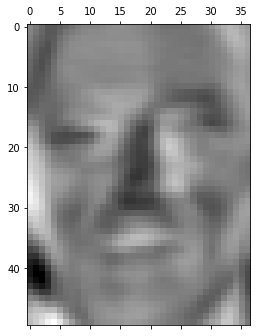

In [224]:
plt.figure()
plt.gray()
plt.matshow(eigenfaces[21].reshape(h,w)) 
plt.show()

### Projecting the input data on the eigenfaces orthonormal basis

In [ ]:
X_train_acp = pca.transform(X_train)


2021-10-08 19:34:27,833 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2021-10-08 19:34:28,366 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2021-10-08 19:34:28,786 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2021-10-08 19:34:29,327 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.253s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.036s
Fitting the classifier to the training set
done in 56.011s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in 0.067s
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.79      0.87      0.83        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.84      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85       322
        macro avg       0.88      0.72      0.78       

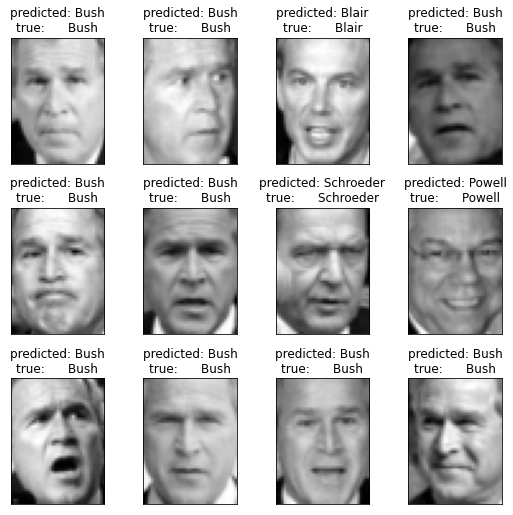

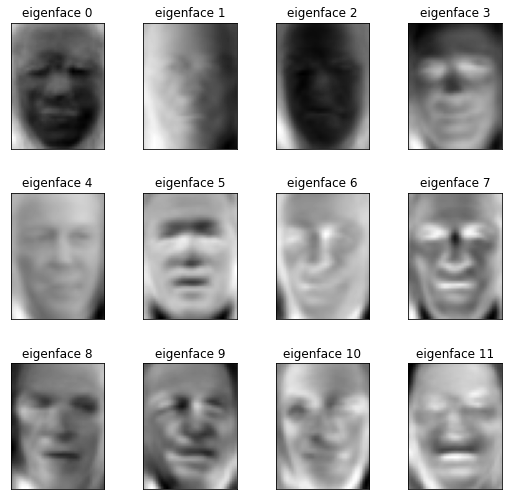

In [209]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [214]:
print(lfw_people['DESCR'])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [215]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [216]:
print(lfw_people['target'])

[5 6 3 ... 5 3 5]


In [217]:
len(lfw_people['target'])

1288